In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Folder Split


In [ ]:
!mkdir output_folder


In [ ]:
!unzip "/content/drive/MyDrive/charts.zip" -d "/content/output_folder"

In [ ]:
import shutil, os
import pandas as pd

In [ ]:
df = pd.read_csv('/content/output_folder/charts/train_val.csv', sep=",", names=['image_index','type'])



In [ ]:
labels = df.iloc[1:,:].sort_values('type')
class_names = list(labels.type.unique())


In [ ]:
class_names

['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical']

In [ ]:
'''l=list(labels[labels['type']==c]['image_index'])'''

"l=list(labels[labels['type']==c]['image_index'])"

In [ ]:
'''for c in class_names:
    for i in l:
      print(i+'.png')
'''

"for c in class_names:\n    for i in l:\n      print(i+'.png')\n"

In [ ]:
for i in class_names:
    os.makedirs(os.path.join('test_',i))


In [ ]:
'''for c in class_names:
  print(c)'''

'for c in class_names:\n  print(c)'

In [ ]:
for c in class_names:
    for i in list(labels[labels['type']==c]['image_index']):

        #create path to the image 
        i=i+'.png'
        #print(i)
        get_image = os.path.join('/content/output_folder/charts/train_val',i)

        #If image has not already exist in the new folder create one        
        if not os.path.exists('test_/'+c+i):
            # move the image 
            move_image_to_cat = shutil.move(get_image,'test_/'+c)

In [ ]:
for c in class_names:
    print (c)
    for i in list(labels[labels['type']==c]['image_index']):
      print(i)

In [ ]:
import cv2

im = cv2.imread('/content/test_/dot_line/800.png')

print(type(im))
# <class 'numpy.ndarray'>

print(im.shape)
print(type(im.shape))
# (225, 400, 3)
# <class 'tuple'>

# Generator

In [ ]:
import glob
train_dir='/content/test_/'
file_ = []
for i in range(5) :
    imfile = glob.glob(train_dir+class_names[i]+'/*.png')
    file_ += [len(imfile)]

(file_)

[200, 200, 200, 200, 200]

In [ ]:
'''
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (9,6))
bx = fig.add_subplot()
bx.bar(class_names,file_)
plt.xticks(rotation = 90)
plt.show()
'''

'\nimport matplotlib.pyplot as plt\nfig = plt.figure(figsize = (9,6))\nbx = fig.add_subplot()\nbx.bar(class_names,file_)\nplt.xticks(rotation = 90)\nplt.show()\n'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input


In [ ]:
data_generator = ImageDataGenerator(
        validation_split=0.05,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.10,
        horizontal_flip=True,
       # preprocessing_function=preprocess_input,
        fill_mode='nearest')
im_shape=(128,128)
BATCH_SIZE = 16
val_data_generator = ImageDataGenerator(validation_split=0.2,
                                        #preprocessing_function=preprocess_input
                                        )
train_generator = data_generator.flow_from_directory('/content/test_/',target_size=im_shape, shuffle=True,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
validation_generator = val_data_generator.flow_from_directory('/content/test_/',target_size=im_shape, shuffle=False, 
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

test_generator = ImageDataGenerator(
    #preprocessing_function=preprocess_input,
    )
test_generator = test_generator.flow_from_directory('/content/output_folder/charts/',target_size=im_shape,classes=['test'], shuffle=False,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 950 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Found 50 images belonging to 1 classes.
Classes: ['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical']


In [ ]:
'''
unique, counts = np.unique(train_ds.classes, return_counts=True)
dict1 = dict(zip(train_ds.class_indices, counts))

keys = dict1.keys()
values = dict1.values()

plt.xticks(rotation='vertical')
bar = plt.bar(keys, values)
'''

"\nunique, counts = np.unique(train_ds.classes, return_counts=True)\ndict1 = dict(zip(train_ds.class_indices, counts))\n\nkeys = dict1.keys()\nvalues = dict1.values()\n\nplt.xticks(rotation='vertical')\nbar = plt.bar(keys, values)\n"

In [ ]:
'''
from mpl_toolkits.axes_grid1 import ImageGrid

def show_grid(image_list, nrows, ncols, label_list=None, show_labels=False, figsize=(10,10)):

    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111, 
                     nrows_ncols=(nrows, ncols),  
                     axes_pad=0.2, 
                     share_all=True,
                     )
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i],cmap='Greys_r')
        ax.axis('off')
x,y = next(train_ds)

show_grid(x,2,4,show_labels=True,figsize=(10,10))
'''

"\nfrom mpl_toolkits.axes_grid1 import ImageGrid\n\ndef show_grid(image_list, nrows, ncols, label_list=None, show_labels=False, figsize=(10,10)):\n\n    fig = plt.figure(None, figsize,frameon=False)\n    grid = ImageGrid(fig, 111, \n                     nrows_ncols=(nrows, ncols),  \n                     axes_pad=0.2, \n                     share_all=True,\n                     )\n    for i in range(nrows*ncols):\n        ax = grid[i]\n        ax.imshow(image_list[i],cmap='Greys_r')\n        ax.axis('off')\nx,y = next(train_ds)\n\nshow_grid(x,2,4,show_labels=True,figsize=(10,10))\n"

#Model _not used trial part


Vgg16


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras import applications
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Flatten, Dropout, GlobalAveragePooling2D
import keras
from keras.models import Sequential, Model

import tensorflow
from keras import optimizers

In [ ]:

vgg16 = keras.applications.vgg16.VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

x = vgg16.get_layer('block5_conv3').output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(5, activation='sigmoid')(x)

model_final = Model(inputs=vgg16.input, outputs=x)

for layer in vgg16.layers:
    layer.trainable = False

model_final.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow import keras

epochs = 40

# Saving the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

history = model_final.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)


In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import os
import pandas as pd
import seaborn as sns
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications import vgg16
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, ReLU, Activation
from tensorflow.keras.models import Sequential

from tensorflow.keras.activations import swish,relu
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import random
import imgaug as ia
import imgaug.augmenters as iaa
from keras.utils import layer_utils
from tensorflow.keras.utils import to_categorical
from statistics import mean
import math
import cv2
from tensorflow import keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Greens):
    
    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Classification Report
                  precision    recall  f1-score   support

        dot_line       1.00      1.00      1.00        40
hbar_categorical       1.00      1.00      1.00        40
            line       1.00      1.00      1.00        40
             pie       1.00      1.00      1.00        40
vbar_categorical       1.00      1.00      1.00        40

        accuracy                           1.00       200
       macro avg       1.00      1.00      1.00       200
    weighted avg       1.00      1.00      1.00       200



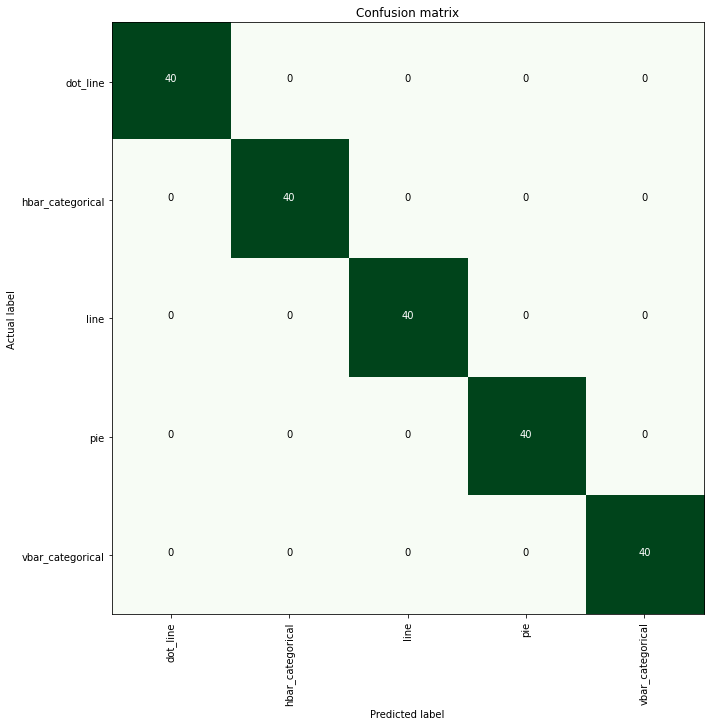

In [ ]:
#val
import itertools
predictions = model_final.predict_generator(validation_generator)
y_predval_vgg = np.argmax(predictions, axis=1)
cf_matrix = confusion_matrix(validation_generator.classes, y_predval_vgg)
print('Classification Report')
print(classification_report(validation_generator.classes, y_predval_vgg, target_names=class_names))
#plt.figure(figsize=(20,20))
confusionMTX = confusion_matrix(validation_generator.classes, y_predval_vgg) 
plot_confusion_matrix(confusionMTX, classes =class_names) 


# MobilNet Model



In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from IPython.display import Image, display, Markdown
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
import tensorflow as tf

def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))

In [ ]:
image_dir = Path('/content/test_')

filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [ ]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)

image_df = image_df.sample(frac=1).reset_index(drop = True)

image_df.head(3)

,Filepath,Label
0,/content/test_/vbar_categorical/189.png,vbar_categorical
1,/content/test_/vbar_categorical/37.png,vbar_categorical
2,/content/test_/pie/798.png,pie


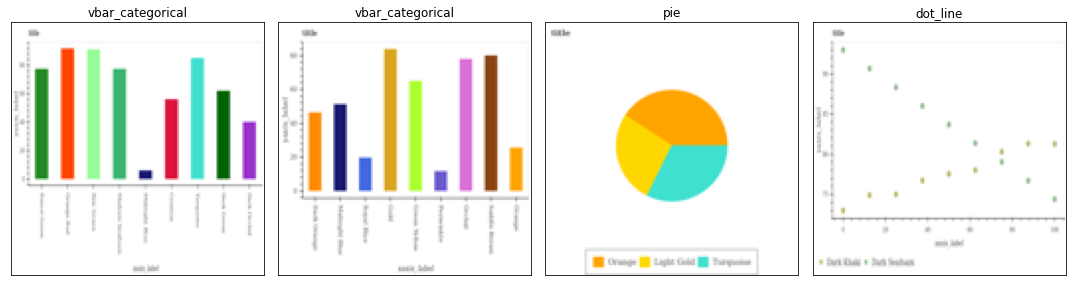

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
def create_gen():
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.1
    )

    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    train_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(128, 128),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='training',
        rotation_range=30, 
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    val_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(128, 128),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='validation',
        rotation_range=30,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=test_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(128, 128),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )
    
    return train_generator,test_generator,train_images,val_images,test_images

In [ ]:
train_df, test_df = train_test_split(image_df, train_size=0.9, shuffle=True, random_state=1)
train_generator,test_generator,train_images,val_images,test_images = create_gen()

Found 810 validated image filenames belonging to 5 classes.
Found 90 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

9420800/9406464 [==============================] - 0s 0us/step
Epoch 1/10
26/26 [==============================] - 15s 92ms/step - loss: 0.2366 - accuracy: 0.9284 - val_loss: 9.1841e-04 - val_accuracy: 1.0000
Epoch 2/10
26/26 [==============================] - 1s 41ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.9185e-04 - val_accuracy: 1.0000
Epoch 3/10
26/26 [==============================] - 1s 39ms/step - loss: 0.0023 - accuracy: 0.9988 - val_loss: 6.0036e-04 - val_accuracy: 1.0000
Epoch 4/10
26/26 [==============================] - 1s 42ms/step - loss: 5.3900e-04 - accuracy: 1.0000 - val_loss: 1.1441e-04 - val_accuracy: 1.0000
Epoch 5/10
26/26 [==============================] - 1s 41ms/step - loss: 2.1609e-04 - accuracy: 1.0000 - val_loss: 8.7355e-05 - val_accuracy: 1.0000
Epoch 6/10
26/26 [==============================] - 1s 42ms/step - loss: 1.6653e-04 - accuracy: 1.0000 - val_loss: 7.6726e-05 - val_accuracy: 1.0000
Epoch 7/10
26/26 [==============================] - 1s

KeyboardInterrupt: ignored

In [ ]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

The first 5 predictions: ['pie', 'line', 'vbar_categorical', 'hbar_categorical', 'line']


In [ ]:
from sklearn.metrics import classification_report
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

                  precision    recall  f1-score   support

        dot_line       1.00      1.00      1.00        21
hbar_categorical       1.00      1.00      1.00        24
            line       1.00      1.00      1.00        25
             pie       1.00      1.00      1.00        13
vbar_categorical       1.00      1.00      1.00        17

        accuracy                           1.00       100
       macro avg       1.00      1.00      1.00       100
    weighted avg       1.00      1.00      1.00       100



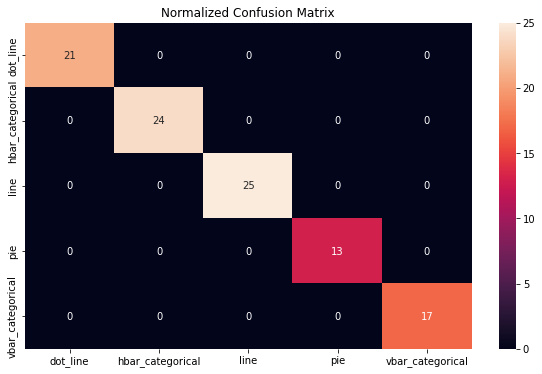

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize=None)
plt.figure(figsize = (10,6))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
plt.title('Normalized Confusion Matrix')
plt.show()

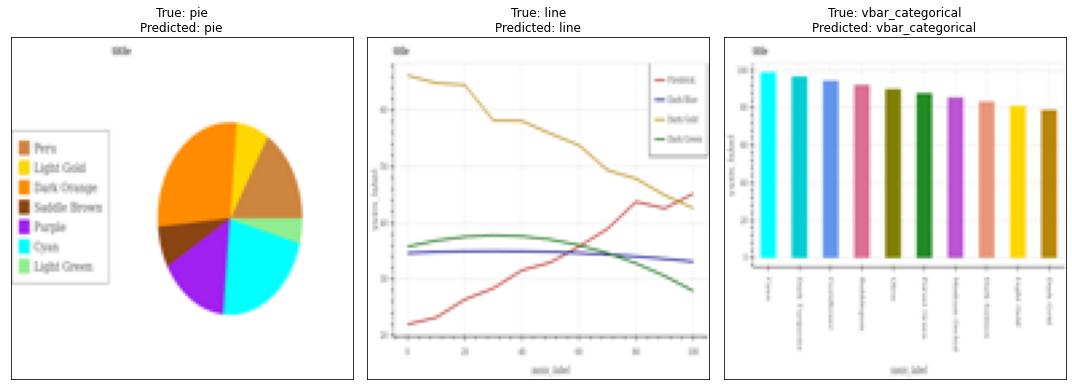

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
   
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
   
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

 
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    
    grads = tape.gradient(class_channel, last_conv_layer_output)

   
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

  
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

   
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
   
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

   
    jet = cm.get_cmap("jet")

   
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

   
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    
    superimposed_img.save(cam_path)

   
    return cam_path
    
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

last_conv_layer_name = "Conv_1"
img_size = (128,128)

# Remove last layer's softmax
model.layers[-1].activation = None

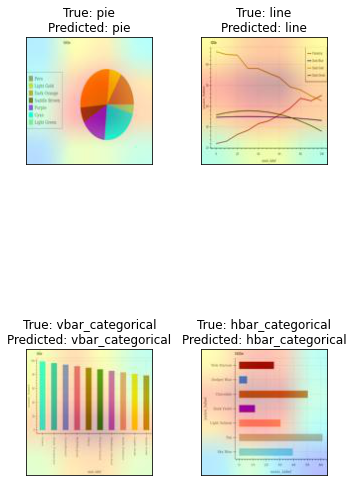

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img_path = test_df.Filepath.iloc[i]
    img_array = preprocess_input(get_img_array(img_path, size=img_size))
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    cam_path = save_and_display_gradcam(img_path, heatmap)
    ax.imshow(plt.imread(cam_path))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

# Prediction on custom image

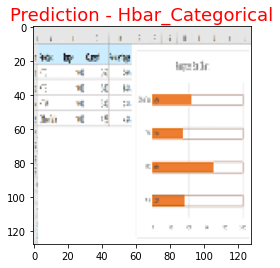

In [ ]:
class_map = train_images.class_indices
classes = []
from keras.preprocessing import image

for key in class_map.keys():
    classes.append(key)
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(128, 128))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img_array)
predict_image('/content/hbar.png', model)

In [ ]:
from keras.models import load_model

model_final.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

#del my_model  # deletes the existing model


my_model = load_model('my_model.h5')

In [ ]:
from keras.models import load_model

my_model = load_model('my_model.h5')

#Testing on custom images


### Aim was to check GradCam, not overall model performance wrt classification

In [ ]:
image_dir1 = Path('/content/drive/MyDrive/custom/')

# Get filepaths and labels
filepaths1 = list(image_dir1.glob(r'**/*.png'))
labels1 = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths1))

In [ ]:
filepaths1 = pd.Series(filepaths1, name='Filepath').astype(str)
labels1 = pd.Series(labels1, name='Label')

# Concatenate filepaths and labels
image_df1 = pd.concat([filepaths1, labels1], axis=1)

# Shuffle the DataFrame and reset index
image_df1 = image_df1.sample(frac=1).reset_index(drop = True)

# Show the result
image_df1.head(3)

,Filepath,Label
0,/content/drive/MyDrive/custom/line/linegraphdo...,line
1,/content/drive/MyDrive/custom/vbar_categorical...,vbar_categorical
2,/content/drive/MyDrive/custom/dot_line/ext_dot...,dot_line


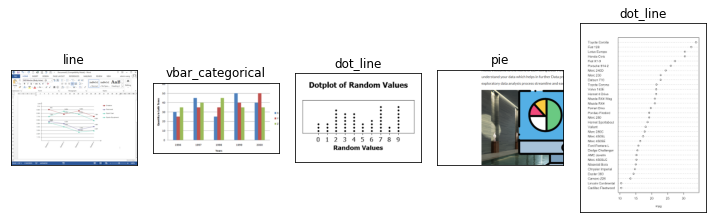

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df1.Filepath[i]))
    ax.set_title(image_df1.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
def create_gen():
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
       )

    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    train_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(128, 128),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='training',
        rotation_range=30, # Uncomment to use data augmentation
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=test_df1,
        x_col='Filepath',
        y_col='Label',
        target_size=(128, 128),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )
    
    return train_generator,test_generator,train_images,test_images

In [ ]:
train_df1, test_df1 = train_test_split(image_df1, train_size=0.6, shuffle=True, random_state=1)


In [ ]:
train_generator1,test_generator1,train_image1s,test_images = create_gen()

Found 900 validated image filenames belonging to 5 classes.
Found 10 validated image filenames belonging to 5 classes.


In [ ]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_image1s.class_indices)
labels = dict((v,k) for k,v in labels1.items())
pred = [labels1[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

The first 5 predictions: ['hbar_categorical', 'dot_line', 'dot_line', 'dot_line', 'dot_line']


In [ ]:
from sklearn.metrics import classification_report
y_test = list(test_df1.Label)

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df1.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df1.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

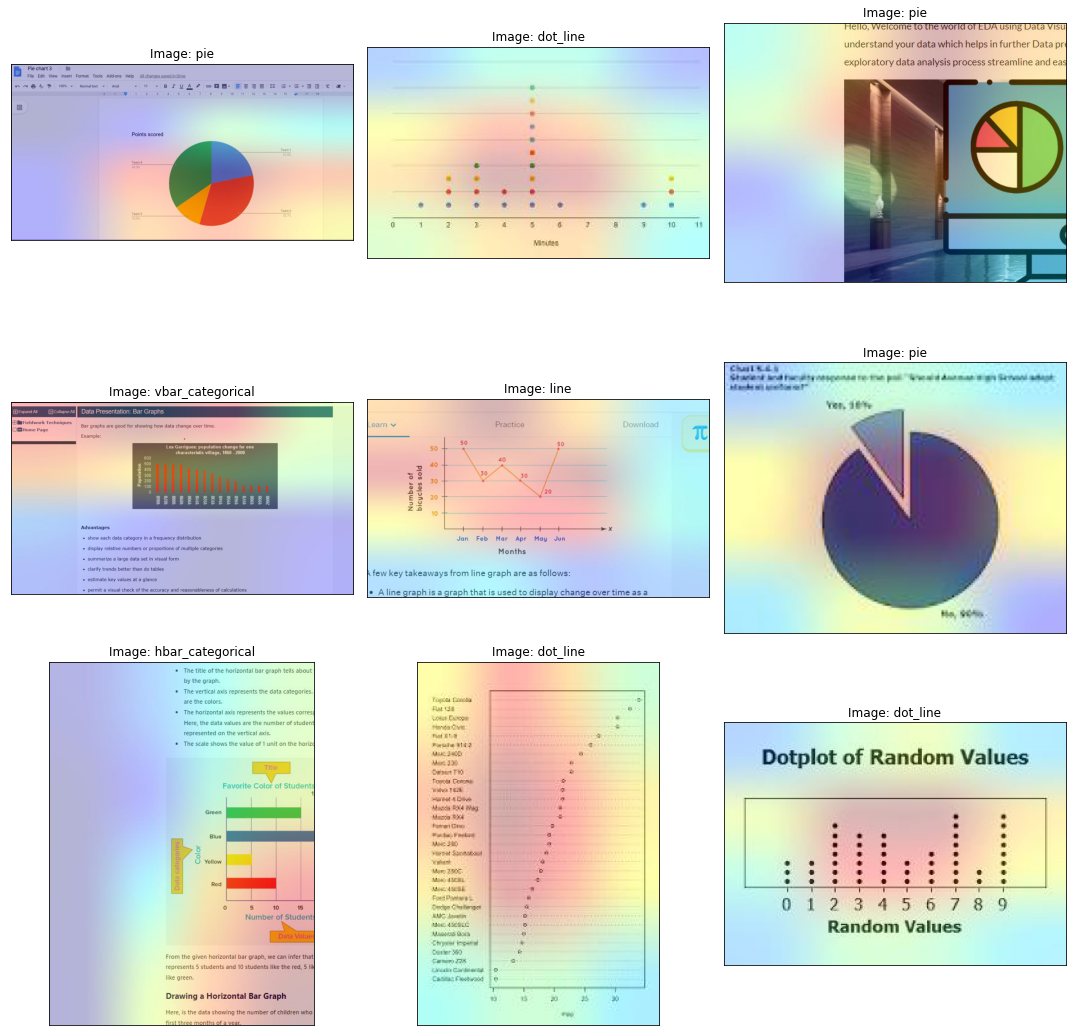

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img_path = test_df1.Filepath.iloc[i]
    img_array = preprocess_input(get_img_array(img_path, size=img_size))
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    cam_path = save_and_display_gradcam(img_path, heatmap)
    ax.imshow(plt.imread(cam_path))
    ax.set_title(f"Image: {test_df1.Label.iloc[i]}")
plt.tight_layout()
plt.show()